<a href="https://colab.research.google.com/github/alda1896/clase2/blob/master/9_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from numpy import zeros, exp, linspace, array, copy
from pylab import plot, show, xlabel, ylabel, legend, title

Resolveremos la ecuacion de onda

\begin{equation}
\frac{\partial\phi^{2}}{\partial t^{2}}=v^{2}\frac{\partial\phi^{2}}{\partial x^{2}}
\end{equation}

Usando el metodo FTCS


\begin{equation}
\frac{\partial\phi^{2}}{\partial t^{2}}=\frac{v^{2}}{a^2}\left [  \phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)\right ]
\end{equation}


Ahora, realizando un cambio de variable

\begin{equation}
\psi=\frac{\partial\phi}{\partial t}
\end{equation}

\begin{equation}
\frac{\partial\psi}{\partial t}=\frac{v^{2}}{a^2}\left [  \phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)\right ]
\end{equation}


Finalmente usando el metodo de Euler

\begin{equation}
\psi(x,t+h)=\psi(x,t)+h\frac{v^{2}}{a^2}\left [  \phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)\right ]
\end{equation}

\begin{equation}
\phi(x,t+h)=\phi(x,t)+h\psi(x,t)
\end{equation}





In [58]:
# Constantes
L = 1  # m
d = 0.01  # m
C = 1  # m/s
sigma = 0.3  # m
v = 100  # m/s
N = 1000  # numero de puntos en x 
a = L / N  # tamaño de paso espacial
h = 1e-6  # paso temporal en segundos
k = h*(v/a)**2
t_f = 10e-3 # s



Nuestra condición inicial es la velocidad $\psi(x)$ dada por la ecuación:


\begin{equation}
\psi(x) = C\frac{x(L-x)}{L^2}e^{-\frac{(x-d)^2}{2\sigma^2}}
\end{equation}



In [59]:
#Funcion de velocidad
def func_psi(x):
    return C * (x * (L - x)) / L ** 2 * exp(-(x - d) ** 2 / (2 * sigma ** 2))

In [60]:

x_points = linspace(0, L, N + 1)  # arreglo que contiene las posiciones
phi = zeros(N + 1, float)    # arreglo que contiene los valores iniciales de la funcon de onda
psi = array(list(map(func_psi, x_points)), float) # arreglo contiene la velocidad evaluadno la func_psi para cada punto en x_points

Phi = [] # Funcion de onda
t = 0.0
acum=0

# ciclo principal que resuelve la ED
while t <= t_f:

    Phi.append(copy(phi))

    old_phi = copy(phi)
    old_psi = copy(psi)

    psi[1: N] = old_psi[1: N] + k * (old_phi[2: N + 1] + old_phi[0: N - 1] - 2 * old_phi[1: N])
    phi[1: N] = old_phi[1: N] + h * old_psi[1: N]
    t += h
    acum=acum+1 
print(acum)

10001


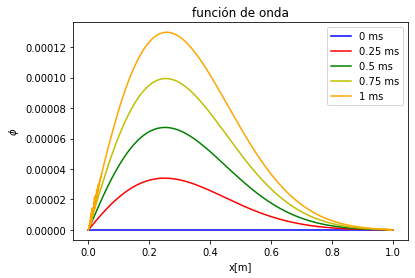

In [61]:
plot(x_points, Phi[0], 'b', label='0 ms') 
plot(x_points, Phi[250], 'r', label='0.25 ms') 
plot(x_points, Phi[500], 'g', label='0.5 ms') 
plot(x_points, Phi[750], 'y',label='0.75 ms') 
plot(x_points, Phi[1000], 'orange', label='1 ms') 
xlabel("x[m]")
ylabel("$\phi$ ")
title('función de onda')
legend()
show()

Como podemos observar en al grafica anterior para tiempos muy cortos, menores a un mili segundo,  la solución parece la esperada viéndose como ondas de aspecto normal en la acuerda

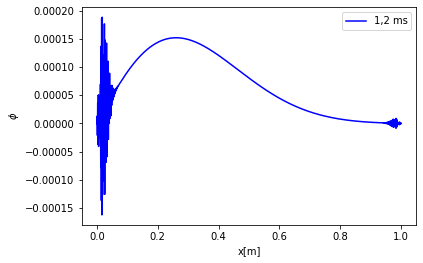

In [62]:
plot(x_points,Phi[1200], 'b', label='1,2 ms') 
ylabel("$\phi$ ")
xlabel("x[m]")
legend()
show()

sin emabargo, como se ve en al gráfica anterior, mas hallá del primer milisegundo, los errores comienzan a aparecer  y en instantes posteriores  los errores han crecido para dominar el cálculo. Así, los resultados no tienen sentido como podemos observar en las graficas siguientes

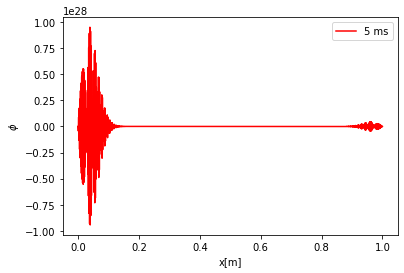

In [63]:
plot(x_points,Phi[5000], 'r', label='5 ms')
ylabel("$\phi$ ")
xlabel("x[m]")
legend()
show()

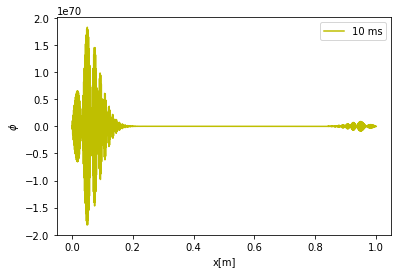

In [64]:
plot(x_points, Phi[10000], 'y', label="10 ms")
ylabel("$\phi$ ")
xlabel("x[m]")
legend()
show()

Lo anterior se debe a que  el  método numerio resulta inestable, cualquier error en el procesamiento se magnifica conforme el cálculo procede. Este es el resultado esperado teniendo en cuenta que el metodo FTCS es parcialmente estable aplicado a la ecuación de difusión de calor, pero se torna inestable al aplicarlo para resolver la ecuación de onda.